# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#   dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

#   import API key
from api_keys import weather_api_key

#   load citipy to determine city based on latitude and longitude
from citipy import citipy

#   Citipy was developed and published by Winston Chen in 2015.
#   The citipy software was developed by Winston Chen and is used with his approval subject to the copyright conditions -
#      located at the following link: https://github.com/wingchen/citipy/blob/master/LICENSE.txt
#   Citipy in turn uses the free Maxmind World Database of Cities (www.maxmind.com/en/free-world-cities-database) to _
#      identify cities to whose population is greater than 500.

#   set output csv file#   establish the range of latitudes and longitudes
output_data_file = "output_data/cities.csv"

#   set the full range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#   set up lists for holding latitudes / longitudes and cities
lat_lngs = []
cities = []

#   create a set of random latitude and longitude combinations and combine
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#   identify nearest city for each latitude and longitude combinations
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#   if the city is unique add it to the cities list
    if city not in cities:
        cities.append(city)

#   print the city count to confirm that there are sufficient cities to poll for weather details and meet requirements
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
#   create url for the openweathermap query with imperial units and city at the end
#   url taken from https://openweathermap.org/appid
#   units of measure:
#      temperature - degreees fahrenheit
#      humidity - percentage
#      cloudiness - percentage
#      wind speed - miles per hour
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

#   create lists for the results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

#   counter for 60 second delay after every 50 cities to avoid API errors due to large calls
counter = 0

#   counters for cities found and cities not found
found_counter = 0
not_found_counter = 0

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        counter = counter + 1
        found_counter = found_counter + 1
        print(f"City No.: {found_counter}, "f"Found: {city}")
    except:
        counter = counter + 1
        not_found_counter = not_found_counter + 1
        print(f"City No.: {not_found_counter}", f"NOT Found: {city}")
        
#   ***   uncomment the following sleep code if errors occur with this large API call   ***
    #if counter == 50: 
        #time.sleep(60)
        #counter = 0
        
#   print total of cities found and cities not found and verify total of both
print("Cities Found: ", found_counter)
print("Cities Not Found: ", not_found_counter)

#   cities expected is 614 from cell above
#   cities found = 570
#   cities not found = 44
#   total 614 confirmed


City No.: 1, Found: port alfred
City No.: 2, Found: mar del plata
City No.: 3, Found: kwekwe
City No.: 4, Found: malente
City No.: 5, Found: punta arenas
City No.: 6, Found: albany
City No.: 7, Found: hermanus
City No.: 8, Found: itacare
City No.: 1 NOT Found: illoqqortoormiut
City No.: 9, Found: chunhuhub
City No.: 10, Found: khatanga
City No.: 11, Found: mahebourg
City No.: 12, Found: erzin
City No.: 13, Found: mbuji-mayi
City No.: 14, Found: ostrovnoy
City No.: 15, Found: sao filipe
City No.: 16, Found: busselton
City No.: 17, Found: port elizabeth
City No.: 18, Found: volyne
City No.: 19, Found: svetlogorsk
City No.: 20, Found: ushuaia
City No.: 21, Found: calama
City No.: 22, Found: bluff
City No.: 23, Found: atuona
City No.: 24, Found: rikitea
City No.: 25, Found: lorengau
City No.: 26, Found: colares
City No.: 27, Found: homer
City No.: 28, Found: junin
City No.: 29, Found: vila franca do campo
City No.: 30, Found: kushmurun
City No.: 31, Found: cedar city
City No.: 32, Found: b

City No.: 244, Found: merauke
City No.: 245, Found: pevek
City No.: 246, Found: ilulissat
City No.: 247, Found: mayo
City No.: 248, Found: yumen
City No.: 249, Found: hasaki
City No.: 250, Found: coquimbo
City No.: 251, Found: pathein
City No.: 252, Found: yerbogachen
City No.: 253, Found: avera
City No.: 254, Found: mogadishu
City No.: 255, Found: liverpool
City No.: 256, Found: longyearbyen
City No.: 257, Found: belmonte
City No.: 22 NOT Found: barentsburg
City No.: 258, Found: north bend
City No.: 259, Found: karratha
City No.: 260, Found: manacor
City No.: 261, Found: klaksvik
City No.: 262, Found: sakakah
City No.: 263, Found: beringovskiy
City No.: 264, Found: nyurba
City No.: 23 NOT Found: daxian
City No.: 265, Found: escuinapa
City No.: 266, Found: gizo
City No.: 24 NOT Found: tsihombe
City No.: 267, Found: stornoway
City No.: 268, Found: santiago de cuba
City No.: 269, Found: houma
City No.: 25 NOT Found: kazalinsk
City No.: 270, Found: asfi
City No.: 271, Found: shitanjing
Ci

City No.: 490, Found: vidim
City No.: 491, Found: lampang
City No.: 492, Found: la ronge
City No.: 493, Found: voznesenye
City No.: 494, Found: presidencia roque saenz pena
City No.: 495, Found: salinas
City No.: 496, Found: ardabil
City No.: 497, Found: san patricio
City No.: 498, Found: pionki
City No.: 38 NOT Found: lolua
City No.: 499, Found: santa rosa
City No.: 39 NOT Found: vaitupu
City No.: 500, Found: cap malheureux
City No.: 501, Found: adrar
City No.: 502, Found: beni
City No.: 503, Found: college
City No.: 504, Found: mirnyy
City No.: 505, Found: namibe
City No.: 506, Found: zhuhai
City No.: 507, Found: murray
City No.: 508, Found: kommunisticheskiy
City No.: 509, Found: tabory
City No.: 510, Found: phaltan
City No.: 511, Found: victoriaville
City No.: 512, Found: mamakan
City No.: 513, Found: nikolayevka
City No.: 514, Found: sikonge
City No.: 515, Found: yashkul
City No.: 516, Found: zaraza
City No.: 517, Found: ribeirao branco
City No.: 518, Found: bengkulu
City No.: 519

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#   create the weather dataframe
weather_df = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Max Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

#   export the city data into a .csv and display the dataframe
weather_df.to_csv("cities.csv", index = False)
weather_df

#   check that the data frame contains 570 rows for cities found 

,City,Country,Max Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,port alfred,ZA,72.64,92,51,14.72,-33.5906,26.8910,1641768476
1,mar del plata,AR,78.01,36,0,8.99,-38.0023,-57.5575,1641768671
2,kwekwe,ZW,65.73,92,100,2.44,-18.9281,29.8149,1641768424
3,malente,DE,39.11,97,100,5.19,54.1712,10.5552,1641768672
4,punta arenas,CL,50.11,66,75,17.27,-53.1500,-70.9167,1641768673
...,...,...,...,...,...,...,...,...,...
565,chimoio,MZ,71.46,88,75,3.44,-19.1164,33.4833,1641769032
566,khorramshahr,IR,51.76,93,57,4.61,30.4397,48.1664,1641769033
567,saint anthony,US,5.94,58,40,4.00,45.0205,-93.2180,1641769034
568,alyangula,AU,84.07,70,54,4.61,-13.8483,136.4192,1641769034


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#   identify cities where humidity > 100%
humidity100_df = weather_df[(weather_df['Humidity'] > 100)]
humidity100_df
#   "humidity100_df" - shows that there are no cities where humidity > 100% 

,City,Country,Max Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [8]:
#   get the indices of cities where humidity > 100%.
humidity100_df.index
#   "humidity100_df" - shows that there are no cities where humidity > 100% 

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
#   format the date in the weather_df dataset as "run_date" for graph titles
run_date = weather_df["Date"].max()
rundate = datetime.utcfromtimestamp(run_date).strftime('%m-%d-%Y')


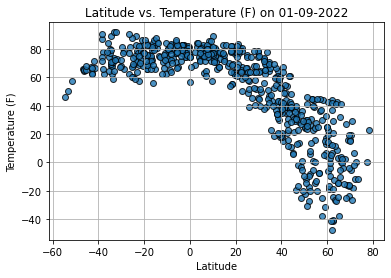

In [11]:
#   latitude versus temperature scatterplot as per rubric instructions
#   Note the temperature is actually maximum temperature as per prior rubric instructions for dataframe contents

#   set the data to plot
plt.scatter(weather_df["Latitude"], 
            weather_df["Max Temperature"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#   add titles and axis labels and format time
plt.title(f"Latitude vs. Temperature (F) on {rundate}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude") 

#   add gridlines
plt.grid(True)

#   save the scatterplot as a png file
plt.savefig("Latitude vs Temperature (F) on {rundate}.png")
          
#   display the scatterplot
plt.show()


In [ ]:
#   Latitude vs Temperature Scatter Plot Insights
#   The scatter plot maps cities' temperature against their latitude.
#   The arc of the scatter plot shows increasing temperatures in the Southern Hemisphere (latitude < 0) as it is summer time.
#   The arc of the scatter plot shows decreasing temperatures in the Northern Hemisphere (latitude > 0) as it is winter time.
#   The arc of the scatter plot shows increasing temperatures near the equator (latitude 0) and lower temperatures further -
#   away from the equator.


## Latitude vs. Humidity Plot

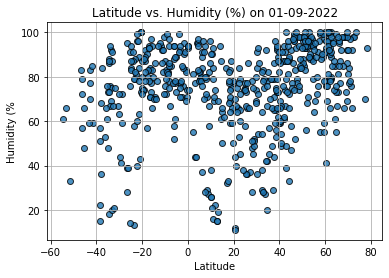

In [13]:
#   latitude versus humidity scatterplot
#   set the data to plot
plt.scatter(weather_df["Latitude"], 
            weather_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#   add titles and axis labels and format time 
plt.title(f"Latitude vs. Humidity (%) on {rundate}")
plt.ylabel("Humidity (%")
plt.xlabel("Latitude")

#   add gridlines
plt.grid(True)

#   save the scatterplot as a png file
plt.savefig("Latitude vs Humidity % on {rundate}.png")
 
#   display the scatterplot
plt.show()

In [ ]:
#   Latitude vs Humidity Scatter Plot Insights
#   There does not appear to be any particular correlation between latitude and humidity.


## Latitude vs. Cloudiness Plot

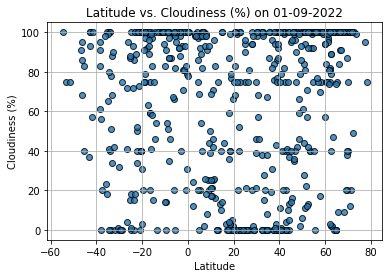

In [14]:
#   latitude versus cloudiness scatterplot
#   set the data to plot
plt.scatter(weather_df["Latitude"], 
            weather_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#   add titles and axis labels and format time
plt.title(f"Latitude vs. Cloudiness (%) on {rundate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#   add gridlines
plt.grid(True)

#   save the scatterplot as a png file
plt.savefig("Latitude vs Cloudiness.png")
 
#   display the scatterplot
plt.show()

In [15]:
#   The scatter plot maps cities' cloudiness percentage against their latitude.
#   There does not appear to be any particular correlation between cloudiness and latitude. 


## Latitude vs. Wind Speed Plot

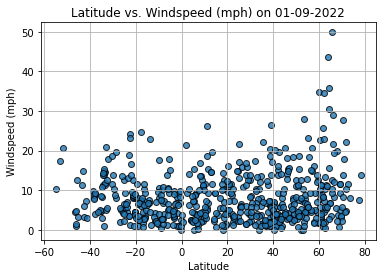

In [16]:
#   latitude versus wind speed scatterplot
#   set the data to plot
plt.scatter(weather_df["Latitude"], 
            weather_df["Windspeed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#   add titles and axis labels and format time
plt.title(f"Latitude vs. Windspeed (mph) on {rundate}")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")

#   add gridlines
plt.grid(True)

#   save the scatterplot as a png file
plt.savefig("Latitude vs Windspeed.png")
 
#   display the scatterplot
plt.show()

In [17]:
#   The scatter plot maps cities' wind speed against their latitude.
#   There does not appear to be any particular correlation between wind speed and latitude.


## Linear Regression

In [18]:
#   format the date in the weather_df dataset as "run_date" for graph titles
max_run_date = weather_df["Date"].max()
runDate = datetime.utcfromtimestamp(max_run_date).strftime('%m-%d-%Y')


In [19]:
#   Create Northern and Southern Hemisphere DataFrames for linear regression analysis
#   Northern Hemisphere is identified by latitudes > 0
#   Southern Hemisphere is identified by latitudes < 0
#   Any cities directly on the equator (latitude = 0) are excluded
northern_df = weather_df.loc[weather_df["Latitude"] > 0]
southern_df = weather_df.loc[weather_df["Latitude"] < 0]
northern_df.count()

#   include in observations - predominance of Northern (67%) versus Southern Hemisphere (33%) cities

City               387
Country            387
Max Temperature    387
Humidity           387
Cloudiness         387
Windspeed          387
Latitude           387
Longitude          387
Date               387
dtype: int64

In [20]:
southern_df.count()
#   include in observations - predominance of Northern (67%) versus Southern Hemisphere (33%) cities

City               183
Country            183
Max Temperature    183
Humidity           183
Cloudiness         183
Windspeed          183
Latitude           183
Longitude          183
Date               183
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
#   define the linear regression function
#   variables are:
#   x_values: first set of data
#   y_values: second set of data
#   regEQplotX: where the linear regression equation appears on the plot x line
#   regEQplotY: where the linear regression equasion appears on the plot y line
#   y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()


The r-square is -0.8337442110756783
y = -1.4x + 93.02


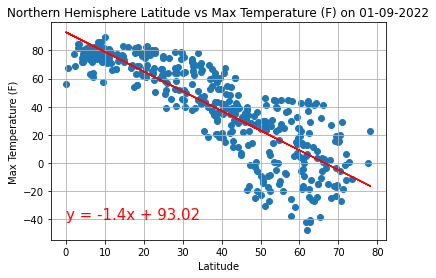

In [28]:
#   Northern Hemisphere - temperature vs. Latitude Linear Regression
#   set the data sets to plot
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temperature"]
#   tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = -40
#   label the y axis
y_label = "Max Temperature (F)"
#   set the title
plt.title(f'Northern Hemisphere Latitude vs Max Temperature (F) on {runDate}')
#   run the function  with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save the linear regression as a png
plt.savefig("Northern Hemisphere Latitude vs Max Temperature (F) on {runDate}.png")
plt.show()



In [ ]:
#   The linear regression analyses Northern Hemisphere cities' temperatures against their latitude.
#   The regression shows that temperatures are higher near the equator and lower further away from the equator.
#   The r-square value of -0.88 rounded shows that there is a strong degree of fit to the line of best fit -
#      for latitude and temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.38164168478774085
y = 0.24x + 79.4


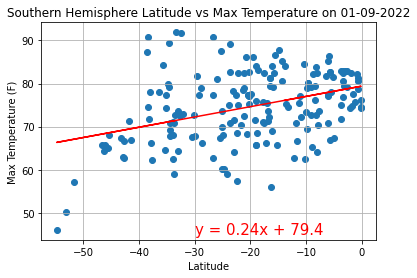

In [27]:
#   Southern Hemisphere - temperature vs. Latitude Linear Regression 
#   set the data sets to plot"]
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temperature"]
#   tweak where the equation appears on the plot
regEQplotX = -30
regEQplotY = 45
#   label the y axis
y_label = "Max Temperature (F)"
#   set the title
plt.title(f'Southern Hemisphere Latitude vs Max Temperature on {runDate}')
#   run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save as a png
plt.savefig("Sourthern Hemisphere Latitude vs Max Temperature (F) on {runDate}.png")
plt.show()


In [ ]:
#   The linear regression analyses Southern Hemisphere cities' temperatures agains their latitude.
#   The regression shows that temperatures are higher near the equator and lower further away from the equator.
#   The r-square value of 0.37 rounded shows that there is a relatively low degree of fit to the line of best fit -
#      for latitude and temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.39584265530918544
y = 0.4x + 59.13


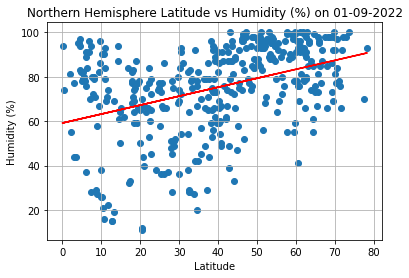

In [30]:
#   Northern Hemisphere - Humidity vs. Latitude Linear Regression
#   set the data sets to plot
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
#   tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = -40
#   label the y axis
y_label = "Humidity (%)"
#   set the title
plt.title(f'Northern Hemisphere Latitude vs Humidity (%) on {runDate}')
#   run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save as a png
plt.savefig("Northern Hemisphere Latitude vs Humidity on {runDate}.png")
plt.show()


In [ ]:
#   The linear regression analyses Northern Hemisphere cities' humidity agains their latitude.
#   The regression shows that humidity is higher near the equator and lower further away from the equator.
#   The r-square value of -0.88 rounded shows that there is a strong degree of fit to the line of best fit.
#       for latitude and temperature.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.4037381988237891
y = 0.57x + 86.94


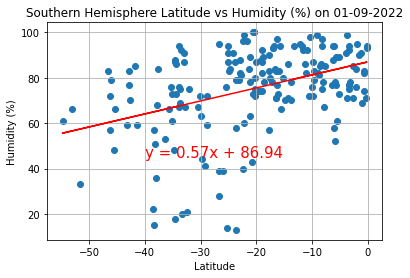

In [31]:
#   Southern Hemisphere - Humidity vs. Latitude Linear Regression
#   set the data sets to plot
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
#   tweak where the equation appears on the plot
regEQplotX = -40
regEQplotY = 45
#   label the y axis
y_label = "Humidity (%)"
#   set the title
plt.title(f'Southern Hemisphere Latitude vs Humidity (%) on {runDate}')
#   run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save as a png
plt.savefig("Southern Hemisphere Latitude vs Humidity on {runDate}.png")
plt.show()


In [32]:
#   The linear regression analyses Southern Hemisphere cities' humidity agains their latitude.
#   The regression shows that humidity is higher near the equator and lower further away from the equator.
#   The r-square value of 0.37 rounded shows that there is relatively low degree of fit to the line of best fit
#       for latitude and temperature.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.21124218669452163
y = 0.42x + 43.18


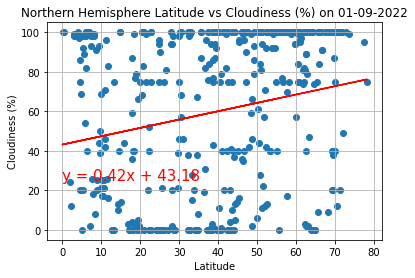

In [33]:
#   Northern Hemisphere - Cloudiness (%)  vs. Latitude Linear Regression
#   set the data sets to plot
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
#   tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 25
#   label the y axis
y_label = "Cloudiness (%)"
#   set the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness (%) on {runDate}')
#   run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save as a png
plt.savefig("Northern Hemisphere Latitude vs Cloudiness on {runDate}.png")
plt.show()


In [34]:
#   The linear regression analyses Northern Hemisphere cities' cloudiness agains their latitude.
#   There does not appear to be any particular pattern to the plot of cloudiness and latitude.
#   The r-square value of 0.27 rounded shows that there is a low degree of fit to the line of best fit for latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.18321538808135984
y = 0.48x + 77.95


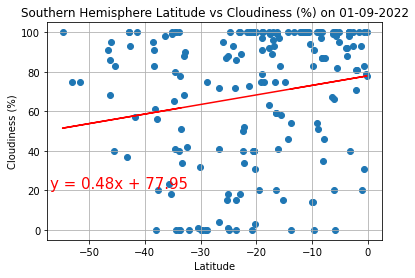

In [35]:
#   Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
#   set the data sets to plot
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
#   tweak where the equation appears on the plot
regEQplotX = -57
regEQplotY = 21
#   label the y axis
y_label = "Cloudiness (%)"
#   set the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness (%) on {runDate}')
#   run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save as a png
plt.savefig("Southern Hemisphere Latitude vs Cloudiness on {runDate}.png")
plt.show()


In [36]:
#   The linear regression analyses Southern Hemisphere cities' cloudiness agains their latitude.
#   There does not appear to be any particular pattern to the plot of cloudiness and latitude.
#   The r-square value of 0.32 rounded shows that there is a low degree of fit to the line of best fit for latitude and cloudiness .

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.16458706674336243
y = 0.06x + 6.07


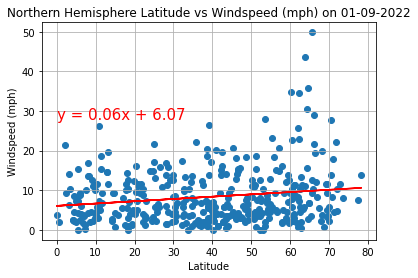

In [38]:
#   Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#   set the data sets to compare
x_values = northern_df["Latitude"]
y_values = northern_df["Windspeed"]
#   tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 28
#   label the y axis
y_label = "Windspeed (mph)"
#   set the title
plt.title(f'Northern Hemisphere Latitude vs Windspeed (mph) on {runDate}')
#   run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save as a png
plt.savefig("Northern Hemisphere Latitude vs Windspeed (mph() on {runDate}.png")
plt.show()


In [ ]:
#   The linear regression analyses Northern Hemisphere cities' wind speed agains their latitude.
#   There does not appear to be any particular pattern to the plot of wind speed and latitude.
#   There are some significant outliers between latitudes 30 and 60.
#       These are possibly due to the prevailing westerlies or anti-trade winds which operate in these latitudes.
#       Further analysis needs to be done to prove or disprove this theory. 
#   The r-square value of 0.21 rounded shows that there is a low degree of fit to the line of best fit for latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.24643133510214907
y = -0.1x + 5.61


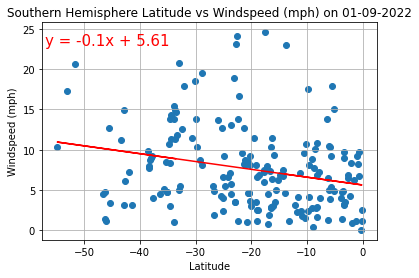

In [39]:
#   Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
#   set the data sets to compare
x_values = southern_df["Latitude"]
y_values = southern_df["Windspeed"]
#   tweak where the equation appears on the plot
regEQplotX = -57
regEQplotY = 23
#   label the y axis
y_label = "Windspeed (mph)"
#   set the title
plt.title(f'Southern Hemisphere Latitude vs Windspeed (mph) on {runDate}')
#   run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#   plot and save as a png
plt.savefig("Southern Hemisphere Latitude vs Windspeed (mph() on {runDate}.png")
plt.show()


In [40]:
#   The linear regression analyses Northern Hemisphere cities' wind speed agains their latitude.
#   There does not appear to be any particular pattern to the plot of wind speed and latitude.
#   The r-square value of -0.37 shows that there is a low degree of fit to the line of best fit for latitude and wind speed.